<a href="https://colab.research.google.com/github/Sandrasalu/Demo/blob/main/MediaPipe_SelfieSeg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.9 MB 1.3 MB/s 


In [ ]:
import mediapipe as mp
import math
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
mp_selfseg = mp.solutions.selfie_segmentation

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving febin.jpg to febin.jpg


febin.jpg


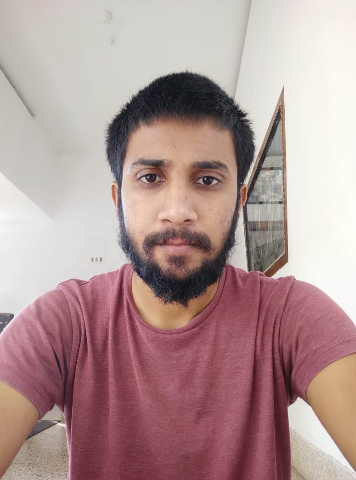

In [ ]:
height = 480
width = 480

def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w :
    img = cv2.resize(image, (width, math.floor(h / (w / width))))
  else:
    img = cv2.resize(image, (math.floor(w / (h / height)), height))
    cv2_imshow(img)

images = {name: cv2.imread(name) for name in uploaded.keys()}
for name, image in images.items():
  print(name)
  resize_and_show(image)

Segmentation mask of febin.jpg:


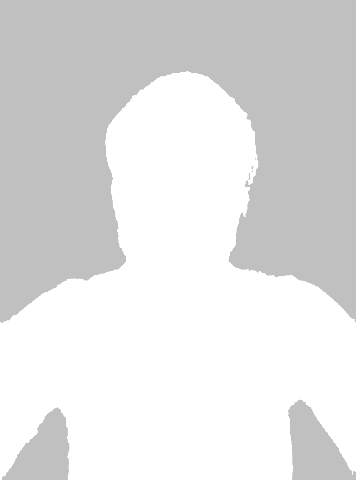

In [ ]:
bg_color = (192, 192, 192)
mask_color = (255, 255, 255)

with mp_selfseg.SelfieSegmentation() as selfie_segmentation:
  for name, image in images.items():
    result = selfie_segmentation.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    fg_image = np.zeros(image.shape, dtype = np.uint8)
    fg_image[:] = mask_color
    bg_image = np.zeros(image.shape, dtype = np.uint8)
    bg_image[:] = bg_color

    condition = np.stack((result.segmentation_mask,) * 3, axis = -1) > 0.2
    output_image = np.where(condition, fg_image, bg_image)

    print(f'Segmentation mask of {name}:')
    resize_and_show(output_image)

Blurred background of febin.jpg:


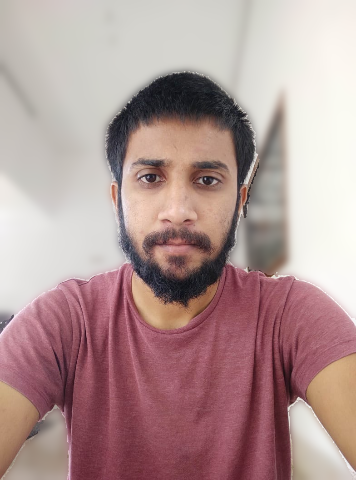

In [ ]:
with mp_selfseg.SelfieSegmentation() as selfie_segmentation:
  for name, image in images.items():
    result = selfie_segmentation.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    blurred = cv2.GaussianBlur(image, (55,55), 0)
    condition = np.stack((result.segmentation_mask,) * 3, axis = -1) > 0.1
    output_image = np.where(condition, image, blurred)

    print(f'Blurred background of {name}:')
    resize_and_show(output_image)
